# Токенизация и подсчет количества слов

### Сколько слов в этом предложении?

* На дворе трава, на траве дрова, не руби дрова на траве двора.*

<b> 12 токенов </b> На, дворе, трава, на, траве, дрова, не, руби, дрова, на, траве, двора<br>
<b> 8 - 9 типов </b> Н/на, дворе, трава, траве, дрова, не, руби, дрова<br>
<b> 6 лексем </b>на, не, двор, трава, дрова, рубить

#### Токен и тип
<b>Тип</b> - уникальное слово из текста<br>
<b>Токен</b> - тип и его позиция в тексте

#### Обозначения
N = число токенов
V - словарь (все типы)
|V| = число типов в словаре

<b>Как связаны N и |V|?</b>

<b>Закон Ципфа</b>
В любом достаточно большом тексте ранг типа обратно пропорционален его частотности $f = \frac {a}{r}$<br>
$f$ - частота типа, $r$ - ранг типа, $a$ - параметр для славянских языков - около 0.07

<b>Закон Хипса</b>
С увеличением длины текста {количества токнов}, количество типов увеличивается в соответствии с законом $|V| =  {K}*{N^b}$<br>
$N$ - число токенов, $|V|$ - количество типов в словаре, $K,b$ - параметры, обычно K $\in$ [10, 100], b $\in$ [0.4, 0.6] 

## Анализ сообщений VK.com

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

df = pd.read_csv('datasets/nlp/vk_texts_with_sources.csv', usecols=['text', 'source'])

df.text.dropna(inplace=True)
df.head()

,text,source
0,Начальник Главного оперативного управления Ген...,mil
1,Артиллерийские подразделения общевойскового об...,mil
2,Подразделения морской пехоты Каспийской флотил...,mil
3,Команды на всеармейских этапах конкурсов АрМИ-...,mil
4,На большом учебно-методическом командирском сб...,mil


## Предварительный анализ коллекции

### Средняя длина текстов

In [3]:
df.text = df.text.astype(str)
len_data = df.text.apply(len)
len_data.describe()

count    11625.000000
mean       684.905978
std        749.412535
min          3.000000
25%        183.000000
50%        501.000000
75%        939.000000
max      13306.000000
Name: text, dtype: float64

### Количество текстов разных пабликов


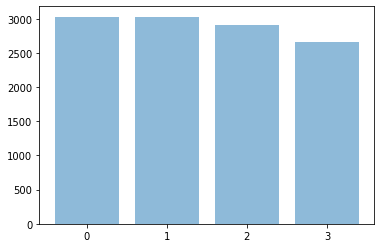

In [4]:
import matplotlib.pyplot as plt
import numpy as np

counts = df.source.value_counts()
values = counts.tolist()
labels = counts.index.tolist()

y_pos = np.arange(len(labels))

plt.bar(y_pos, values, align='center', alpha=.5)
plt.xticks(y_pos, range(len(labels)))

plt.show()

### Длины текстов в символах

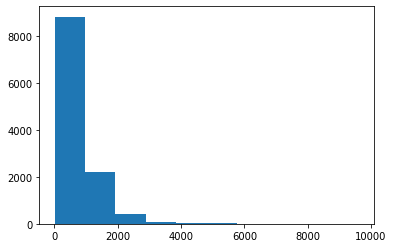

In [5]:
fig, ax = plt.subplots()

length = len_data[len_data < 10000].tolist()

n, bins, patches = ax.hist(length)

fig.show()

### Токенизация

Используем регулярные выражения, чтобы разбить текст на слова

In [6]:
import re

regex = re.compile('[А-Яа-я]+')

def words_only(text, regex=regex):
    try:
        return ' '.join(regex.findall(text))
    except:
        return ''
    
df.text = df.text.str.lower()
df.text = df.text.apply(words_only)

df.text.iloc[0]

'начальник главного оперативного управления генерального штаба вооруженных сил рф генерал полковник сергей рудской провел брифинг для сми по ситуации в сирии с начала этого года сирийскими правительственными войсками при поддержке вкс россии достигнуты значительные успехи по освобождению ключевых районов сирии от остатков террористических группировок это восточная часть провинции идлиб пригороды дамаска восточная гута восточный каламун ярмук северные районы провинции хомс которые в настоящее время находятся полностью под контролем правительственных войск в январе феврале в восточной части провинции идлиб была окружена и уничтожена крупная группировка джабхат ан нусра численностью более боевиков а также разрозненные бандгруппы игиловцев в результате под контроль правительственных войск перешла территория от кафер аккара до саббура с севера на юг и от синджара до эль хаммам с запада на восток площадью более четырех тысяч квадратных километров в настоящее время возобновлено движение по до

### Самые частые слова

In [7]:
from nltk import FreqDist

n_types = []
n_tokens = []
fd = FreqDist()

for index, row in df.iterrows():
    tokens = row['text'].split()
    fd.update(tokens)
    n_types.append(len(fd))
    n_tokens.append(sum(fd.values()))

for i in fd.most_common(10):
    print(i)

('в', 39552)
('и', 29656)
('на', 17274)
('по', 14798)
('с', 11919)
('россии', 9444)
('мвд', 6215)
('из', 4855)
('для', 4635)
('а', 4117)


### Закон Ципфа

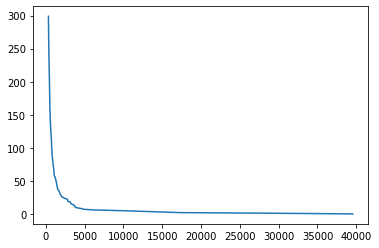

In [8]:
freqs = list(fd.values())
freqs = sorted(freqs, reverse=True)

fig, ax = plt.subplots()
ax.plot(freqs[:300], range(300))
plt.show()

### Сегментация предложений
"!","?" как правило однозначны, проблемы возникают с "."
Бинарный классификатор для сегментации преллодений для каждой точки "." лпределить, является ли она концом 
предложения или нет.

In [9]:
from nltk.tokenize import sent_tokenize

text = "Первое предложение. Второе предложение! И, наконец, третье? В четвертом предложении г. Москва встречается т. к. это город."
sents = sent_tokenize(text)

print(len(sents))
print(*sents, sep='\n')

4
Первое предложение.
Второе предложение!
И, наконец, третье?
В четвертом предложении г. Москва встречается т. к. это город.


In [10]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to D:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Задание 2

Посчитайте количество предложений, токенов и типов из файла task2.txt, Сохраните список токенов в массив tokens.

In [11]:
import re
from nltk import FreqDist

fd = FreqDist()
regex = re.compile('[А-Яа-я]+')

def words_only(text, regex=regex):
    try:
        return ' '.join(regex.findall(text))
    except:
        return ''
    
text = ' '.join([line.strip() for line in open('datasets/nlp/task2.txt', encoding='utf8')])
tokens = words_only(text)
sents = sent_tokenize(text)
print(len(sents))
d1 = nltk.FreqDist(tokens)
print(d1)

9
<FreqDist with 36 samples and 359 outcomes>


### Частотный анализ текста

In [12]:
import nltk

d1 = nltk.FreqDist(tokens) # частотный словарь для текстов
d1.most_common(10) # токен и  его количество появлений в тексте


[(' ', 58),
 ('а', 29),
 ('е', 29),
 ('и', 24),
 ('н', 22),
 ('о', 21),
 ('с', 19),
 ('л', 16),
 ('т', 12),
 ('в', 12)]

## Морфологический анализ

### Задачи морфологи ческого аннализа

* Разбор слов - определение нормальной формы (леммы), основы (стема) и грамматических характеристик слова
* Синтез слова - генерация слова по заданным грамматическим характеристикам

### Морфологический процессор - инструмент морфологического анализа
* Морфологический словарь
* Морфологический анализатор

### Лемматизация
У каждого слова есть лемма (нормальная форма)
* кошке, кошку, кошкам, кошкой $\implies$ кошка
* бежал, бежит, бегу $\implies$ бежать
* белому, белым, белыми $\implies$ белый

In [13]:
sent1 = 'Действительно, на его лице не отражалось никаких чувств – ни проблеска сочувствия не было на нем, \
а ведь боль просто невыносима'
sent2 = 'У страха глаза велики .'

In [14]:
from pymorphy2 import MorphAnalyzer

m = MorphAnalyzer()
lemma1 = [m.parse(word)[0].normal_form for word in sent1.split()]
print(' '.join(lemma1))

действительно, на он лицо не отражаться никакой чувство – ни проблеск сочувствие не быть на нем, а ведь боль просто невыносимый


In [15]:
from pymystem3 import Mystem

m  = Mystem()
lemma2 = m.lemmatize(sent1)
print(''.join(lemma2))

действительно, на его лицо не отражаться никакой чувство – ни проблеск сочувствие не быть на немой, а ведь боль просто невыносимый



### Стемминг
Слова состоят из морфем:  $word = stem + affixes$. Стемминг позволяет отбросить аффиксы. Чаще всего используется алгоритм Портера.
* 1-ый вид ошибки: белый, белка, белье $\implies$  бел

* 2-ой вид ошибки: трудность, трудный $\implies$  трудност, труд 

* 3-ий вид ошибки: быстрый, быстрее $\implies$  быст, побыстрее $\implies$  побыст

Алгоритм Портера состоит из 5 циклов команд, на каждом цикле – операция удаления / замены суффикса. Возможны вероятностные расширения алгоритма.

In [16]:
from nltk.stem.snowball import RussianStemmer

stemmer = RussianStemmer()
words = ['распределение', 'приставить', 'сделала', 'словообразование']
for w in words:
    stem = stemmer.stem(w)
    print(stem)

распределен
пристав
сдела
словообразован


#### Разбор слова 

In [17]:
word1 = 'ГАИ'

In [18]:
m = MorphAnalyzer()
m.parse(word1)

[Parse(word='гаи', tag=OpencorporaTag('NOUN,inan,femn,Sgtm,Fixd,Abbr,Orgn sing,nomn'), normal_form='гаи', score=0.2, methods_stack=((DictionaryAnalyzer(), 'гаи', 289, 0),)),
 Parse(word='гаи', tag=OpencorporaTag('NOUN,anim,masc,Name plur,nomn'), normal_form='гай', score=0.1, methods_stack=((DictionaryAnalyzer(), 'гаи', 42, 6),)),
 Parse(word='гаи', tag=OpencorporaTag('NOUN,inan,femn,Sgtm,Fixd,Abbr,Orgn sing,gent'), normal_form='гаи', score=0.1, methods_stack=((DictionaryAnalyzer(), 'гаи', 289, 1),)),
 Parse(word='гаи', tag=OpencorporaTag('NOUN,inan,femn,Sgtm,Fixd,Abbr,Orgn sing,datv'), normal_form='гаи', score=0.1, methods_stack=((DictionaryAnalyzer(), 'гаи', 289, 2),)),
 Parse(word='гаи', tag=OpencorporaTag('NOUN,inan,femn,Sgtm,Fixd,Abbr,Orgn sing,accs'), normal_form='гаи', score=0.1, methods_stack=((DictionaryAnalyzer(), 'гаи', 289, 3),)),
 Parse(word='гаи', tag=OpencorporaTag('NOUN,inan,femn,Sgtm,Fixd,Abbr,Orgn sing,ablt'), normal_form='гаи', score=0.1, methods_stack=((DictionaryAna

In [19]:
m = Mystem()
m.analyze(word1)

[{'analysis': [{'lex': 'гаи',
    'wt': 0.980514293,
    'gr': 'S,сокр,ед,жен,неод=(пр|вин|дат|род|твор|им)'}],
  'text': 'ГАИ'},
 {'text': '\n'}]

#### Задание 4
Найти в списке персонажей "Война и мир" (task3.txt) все уникальные женские имена

### Первичная обработка текста

#### Удаление стоп-слов

In [20]:
# m = Mystem()
m = MorphAnalyzer()
text = ' '.join([line.strip() for line in open('datasets/nlp/task3.txt', encoding='utf8')])
tokens = words_only(text)

#  [{'analysis': [{'lex': 'вера', 'wt': 0.6768655918, 'gr': 'S,имя,жен,од=им,ед'}], 'text': 'Вера'}, {'text': '\n'}]
names = set()
prog = re.compile('[А-Я]{1}[а-я]+') # Слово с заглавной буквы
tokens = prog.findall(text)
lemmas = [m.parse(word)[0].normal_form for word in tokens]

for word in lemmas:
    if {'Name','femn'} in m.parse(word)[0].tag:
        names.add(word.capitalize())
        
print(names)

{'Элен', 'Карагина', 'Катишь', 'Дуняша', 'Марья', 'Амалия', 'Жозефа', 'Мюрата', 'Настасья', 'Толли', 'Соня', 'Пфуля', 'Рамбаля', 'Пелагея', 'Анисья', 'Аниска', 'Матрёна', 'Курагина', 'Щербинина', 'Елизавета', 'Елена', 'Аграфена', 'Анна', 'Луиза', 'Телянина', 'Алина', 'Диммлера', 'Штрауха', 'Балашева', 'Мария', 'Смольянин', 'Ольга', 'Репнина', 'Катерина', 'Прасковья', 'Наташа', 'Наталья'}


In [21]:
from nltk.corpus import stopwords

print(stopwords.words('Russian'))

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

In [22]:
mystopwords = stopwords.words('russian') + ['это', 'наш' , 'тыс', 'млн', 'млрд', 'также',  'т', 'д']
def remove_stopwords(text, mystopwords=mystopwords):
    try:
        return ' '.join([token for token in text.split() if token in mystopwords])
    except:
        return ''

In [23]:
import nltk

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [24]:
mystoplemmas = ['который','прошлый','сей', 'свой', 'наш', 'мочь']
def remove_stoplemmas(text, mystoplemmas=mystoplemmas):
    try:
        return " ".join([token for token in text.split() if not token in mystoplemmas])
    except:
        return ""


In [25]:
from tqdm import tqdm
df.text = tqdm(df.text.apply(remove_stopwords))
df.text = tqdm(df.text.apply(lemmatize))
df.text = tqdm(df.text.apply(remove_stoplemmas))

100%|███████████████████████████████████████████████████████████████████████| 11625/11625 [00:00<00:00, 1454270.58it/s]


In [26]:
df.text

0         
1         
2         
3         
4         
        ..
11620     
11621     
11622     
11623     
11624     
Name: text, Length: 11625, dtype: object

In [27]:
lemmata = []
for index, row in df.iterrows():
    lemmata += row['text'].split()

fd = FreqDist(lemmata)
for i in fd.most_common(10):
    print(i)